# Problem Set 2: Intro to Pandas

## Part 1

In this problem set we are going to be working with a processed O-D dataset, Pandas, and Matplotlib.

First, a short example will introduce us to the dataset, some data wrangling functions of Pandas, and a few plots with Matplotlib. 
The OD data was collected based on cell phone towers. Usually, OD datasets are quite big, and contain individual data points, with origin-destination information between cell phone towers. In this case, the dataset has previously been aggregated and processed. While the text files are still very big, their size is significantly smaller than the original dataset. 
The files that follow the "Rn_OD_X-Y" naming structure contain the origin-destination flow from hour X to hour Y with the following columns:

* Origin tower ID
* Destination tower ID
* Closest road intersection to origin 
* Closest intersection to destination
* Origin-destination flow

The file "towers_index.txt" contains the locations of all the cell towers with the following columns. The row number is the id of the cell tower starting with 1.

* Latitude
* Longitude
* Node ID of the closest intersection to the tower

Throughout the exercises we will be continuously using Pandas and some of its merging functionality to join the numerous OD files available. We will be building exploratory data visualizations, finding urban patterns and locating divergent areas within the dataset. Some useful documentation for merging data with Pandas can be found at:


http://pandas.pydata.org/pandas-docs/stable/merging.html

First, lets import some of our libraries. If you haven't installed seaborn already, please type on your command line:

```Python
pip install seaborn
```

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# This line lets us plot on our ipython notebook
%matplotlib inline

Let’s read one of the OD files with Pandas. Since the file has no header, we need to provide the header names. Luckily, we have all the information we need on the `DATA_STRUCTURES.txt` file. 

In [12]:
# Imports
import os
import pandas as pd

#List Files
#  local paths are defined by quotation marks
path = "data/Hourly Flows"
all_files = os.listdir(path)
print 'LIST OF ALL FILES'
print all_files
print ' '

# only_txt = [i for i in all_files if i[:2]=='Rn']
target_files = []
for i in all_files:
    if i[:2]=='Rn':
        target_files.append(i)
print 'LIST OF FILES OF INTEREST' 
print target_files
print ' '

# GETTING THE HOUR SUFFIXES
extract1 = [i.split('_')[2] for i in target_files]
extract2 = [i.split('.')[0] for i in extract1]
hourly_suffixes = [i.translate(None, '-') for i in extract2]
print 'HOURLY SUFFIXES'
print hourly_suffixes
print ' '

zipped = zip (target_files, hourly_suffixes)
print zipped

d = {}
for i,j in zipped:
        d[j] = pd.read_csv("data/Hourly Flows/"+ i, header=None, 
                   names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow'+ j])
d


LIST OF ALL FILES
['DATA_STRUCTURES.txt', 'Rn_OD_0-1.txt', 'Rn_OD_1-2.txt', 'Rn_OD_10-11.txt', 'Rn_OD_11-12.txt', 'Rn_OD_12-13.txt', 'Rn_OD_13-14.txt', 'Rn_OD_14-15.txt', 'Rn_OD_15-16.txt', 'Rn_OD_16-17.txt', 'Rn_OD_17-18.txt', 'Rn_OD_18-19.txt', 'Rn_OD_19-20.txt', 'Rn_OD_2-3.txt', 'Rn_OD_20-21.txt', 'Rn_OD_21-22.txt', 'Rn_OD_22-23.txt', 'Rn_OD_23-24.txt', 'Rn_OD_3-4.txt', 'Rn_OD_4-5.txt', 'Rn_OD_5-6.txt', 'Rn_OD_6-7.txt', 'Rn_OD_7-8.txt', 'Rn_OD_8-9.txt', 'Rn_OD_9-10.txt', 'Towers Index.xlsx', 'towers_index.txt']
 
LIST OF FILES OF INTEREST
['Rn_OD_0-1.txt', 'Rn_OD_1-2.txt', 'Rn_OD_10-11.txt', 'Rn_OD_11-12.txt', 'Rn_OD_12-13.txt', 'Rn_OD_13-14.txt', 'Rn_OD_14-15.txt', 'Rn_OD_15-16.txt', 'Rn_OD_16-17.txt', 'Rn_OD_17-18.txt', 'Rn_OD_18-19.txt', 'Rn_OD_19-20.txt', 'Rn_OD_2-3.txt', 'Rn_OD_20-21.txt', 'Rn_OD_21-22.txt', 'Rn_OD_22-23.txt', 'Rn_OD_23-24.txt', 'Rn_OD_3-4.txt', 'Rn_OD_4-5.txt', 'Rn_OD_5-6.txt', 'Rn_OD_6-7.txt', 'Rn_OD_7-8.txt', 'Rn_OD_8-9.txt', 'Rn_OD_9-10.txt']
 
HOURLY SUFFI

{'01':         oid   did  close_rid_origin  close_rid_dest  flow01
 0         1     2             20404           16208       1
 1         1    20             20404           11056       3
 2         1    38             20404           18943       6
 3         1    42             20404           18961       3
 4         1    60             20404           18942       2
 5         1    73             20404           18940       2
 6         1   105             20404           17765       1
 7         1   146             20404           17594       1
 8         1   201             20404           11322       1
 9         1   230             20404           18892       1
 10        1   372             20404           11643       1
 11        1   392             20404           11711       1
 12        1   863             20404           19268       1
 13        3    24             16208           16193       1
 14        3    77             16208           18104       1
 15        3    87

We need to import every file with a separate function. 

`Hint: You can import multiple files with a for loop, or building a function, without having to declare them individually`

In [13]:

database_0 = d[d.keys()[0]]
database_0

d1 = dict(d)
d1.pop(d.keys()[0])
d1.values()
dataframe_list = d1.values()
dataframe_list

for i in d1.values():
    i.drop(i.columns[[0,1,2,3]],axis=1, inplace = True)

d1.values()

all_database = database_0.join(d1.values())

all_database




,oid,did,close_rid_origin,close_rid_dest,flow45,flow1213,flow1314,flow1718,flow1819,flow1920,...,flow23,flow2122,flow2223,flow1011,flow1112,flow2021,flow1617,flow12,flow56,flow910
0,1,37,20404,18728,1,2,1,1,2,1,...,1,25,1,4,2,1,2,1,1,1
1,5,40,11072,18740,1,2,3,1,1,2,...,1,2,1,2,4,20,1,1,1,1
2,5,174,11072,19624,1,4,2,2,1,1,...,1,1,21,1,1,4,3,1,4,4
3,6,40,18825,18740,1,1,1,4,21,8,...,1,2,9,27,3,1,1,1,2,1
4,6,206,18825,18868,1,4,22,2,2,1,...,1,1,1,7,1,1,1,1,1,1
5,6,546,18825,19785,1,1,3,1,1,4,...,1,17,6,1,2,25,4,1,1,1
6,8,128,18789,19007,1,1,1,2,38,1,...,2,11,1,1,23,2,32,1,1,16
7,8,132,18789,11188,1,21,3,25,16,14,...,1,1,1,1,5,7,1,1,1,1
8,8,342,18789,11578,1,7,2,7,1,4,...,1,1,2,52,1,1,5,1,1,1
9,8,352,18789,11564,1,1,1,3,2,12,...,1,5,1,1,2,13,2,2,1,34


If you notice, the df structure of both files is similar. We can perform a SQL style join based on a column or index on either of the df’s. In this case, since the rest of the columns are the same, we are only keeping the flow column of the second df.

`Hint: You can merge multiple files with a for loop, or building a function, without having to do so individually`

In [143]:
combined_flow = df_01.join(df_12['flow'], lsuffix='0-1', rsuffix='1-2')
combined_flow[:10]

for i in d:
    combined_flow = df_01.join(d[i]['flow'], lsuffix='0-1', rsuffix='1-2')

combined_flow[:10]

,oid,did,close_rid_origin,close_rid_dest,flow0-1,flow1-2
0,1,2,20404,16208,1,1
1,1,20,20404,11056,3,1
2,1,38,20404,18943,6,1
3,1,42,20404,18961,3,1
4,1,60,20404,18942,2,1
5,1,73,20404,18940,2,1
6,1,105,20404,17765,1,1
7,1,146,20404,17594,1,1
8,1,201,20404,11322,1,1
9,1,230,20404,18892,1,2


We can visualize our newly merged tables with a basic area plot. This plot visualizes the flow within the cell phone towers throughout the 2 different time ranges. By slicing the dataset, we are only plotting some of the towers. 

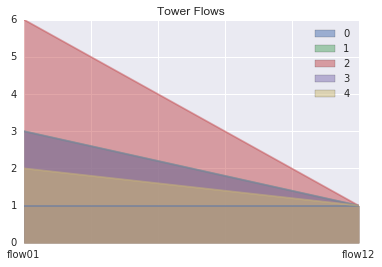

In [14]:
all_database[:5][['flow01', 'flow12']].transpose().plot(kind='area', stacked=False, 
                                                            legend=True, title='Tower Flows')



**Based on the code snippets, and your previous code your job is to build:**

* A function that merges the 24 hour ranges into a single DataFrame. The function must have the following inputs/outputs:
    1. Inputs: 
      1. A file path to extract the different files from
      * A column name to merge into a single DataFrame
      * A list of column names for the DataFrame
    2. Outputs: 
      1. A DataFrame with the merged columns

In [60]:
# Add your code below:
# 01 
# IMPORT LIBRARIES
import os
import pandas as pd

# 02
# LIST ALL FILES
# Note:local paths are defined by quotation marks
path = "data/Hourly Flows"
all_files = os.listdir(path)
print 'LIST OF ALL FILES'
print all_files
print ' '

# 03 
# LIST OID FILES
# only_txt = [i for i in all_files if i[:2]=='Rn']
target_files = []
for i in all_files:
    if i[:2]=='Rn':
        target_files.append(i)
print 'LIST OF FILES OF INTEREST' 
print target_files
print ' '

# 04
# GETTING THE HOUR SUFFIXES
extract1 = [i.split('_')[2] for i in target_files]
extract2 = [i.split('.')[0] for i in extract1]
hourly_suffixes = [i.translate(None, '-') for i in extract2]
print 'HOURLY SUFFIXES'
print hourly_suffixes
print ' '

# 05
# READ FILES
zipped = zip (target_files, hourly_suffixes)
print zipped

d = {}
for i,j in zipped:
        d[j] = pd.read_csv("data/Hourly Flows/"+ i, header=None, 
                   names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow'+ j])
d

# 06 
# SET BASELINE DATABASE
database_0 = d[d.keys()[0]]
database_0

# 07.1 
# DEFINE EXTRA DATABASES TO APPEND TO BASELINE
database_1 = dict(d)
database_1.pop(d.keys()[0])
database_1.values()


# 07.2 
# DROP COLUMNS WE ARE NOT INTERESTED IN APPENDING
for i in database_1.values():
    i.drop(i.columns[[0,1,2,3]],axis=1, inplace = True)

database_1.values()

# 08
# MERGE DATABASE
merged_database = database_0.join(database_1.values())

merged_database

list(merged_database.columns.values)



LIST OF ALL FILES
['DATA_STRUCTURES.txt', 'Rn_OD_0-1.txt', 'Rn_OD_1-2.txt', 'Rn_OD_10-11.txt', 'Rn_OD_11-12.txt', 'Rn_OD_12-13.txt', 'Rn_OD_13-14.txt', 'Rn_OD_14-15.txt', 'Rn_OD_15-16.txt', 'Rn_OD_16-17.txt', 'Rn_OD_17-18.txt', 'Rn_OD_18-19.txt', 'Rn_OD_19-20.txt', 'Rn_OD_2-3.txt', 'Rn_OD_20-21.txt', 'Rn_OD_21-22.txt', 'Rn_OD_22-23.txt', 'Rn_OD_23-24.txt', 'Rn_OD_3-4.txt', 'Rn_OD_4-5.txt', 'Rn_OD_5-6.txt', 'Rn_OD_6-7.txt', 'Rn_OD_7-8.txt', 'Rn_OD_8-9.txt', 'Rn_OD_9-10.txt', 'Towers Index.xlsx', 'towers_index.txt']
 
LIST OF FILES OF INTEREST
['Rn_OD_0-1.txt', 'Rn_OD_1-2.txt', 'Rn_OD_10-11.txt', 'Rn_OD_11-12.txt', 'Rn_OD_12-13.txt', 'Rn_OD_13-14.txt', 'Rn_OD_14-15.txt', 'Rn_OD_15-16.txt', 'Rn_OD_16-17.txt', 'Rn_OD_17-18.txt', 'Rn_OD_18-19.txt', 'Rn_OD_19-20.txt', 'Rn_OD_2-3.txt', 'Rn_OD_20-21.txt', 'Rn_OD_21-22.txt', 'Rn_OD_22-23.txt', 'Rn_OD_23-24.txt', 'Rn_OD_3-4.txt', 'Rn_OD_4-5.txt', 'Rn_OD_5-6.txt', 'Rn_OD_6-7.txt', 'Rn_OD_7-8.txt', 'Rn_OD_8-9.txt', 'Rn_OD_9-10.txt']
 
HOURLY SUFFI

['oid',
 'did',
 'close_rid_origin',
 'close_rid_dest',
 'flow45',
 'flow1213',
 'flow1314',
 'flow1718',
 'flow1819',
 'flow1920',
 'flow1415',
 'flow89',
 'flow67',
 'flow34',
 'flow78',
 'flow1516',
 'flow01',
 'flow2324',
 'flow23',
 'flow2122',
 'flow2223',
 'flow1011',
 'flow1112',
 'flow2021',
 'flow1617',
 'flow12',
 'flow56',
 'flow910']

* Using all the towers: Make an area plot that shows the relationship between OD flows throughout the 24 hr ranges.

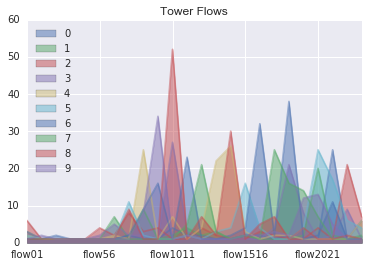

In [16]:
# Add your code below:
all_database[:10][['flow01', 'flow12', 'flow23','flow34', 'flow45', 'flow56', 'flow67', 'flow78', 'flow89', 'flow910','flow1011', 'flow1112', 'flow1213', 'flow1314', 'flow1415', 'flow1516', 'flow1617', 'flow1718', 'flow1819', 'flow1920', 'flow2021', 'flow2122', 'flow2223', 'flow2324' ]].transpose().plot(kind='area', stacked=False, 
                                                            legend=True, title='Tower Flows')

** Choose ONE of the following TWO questions.**
* An area plot with **four** different areas:
    1. The average flow values across **all** towers
    2. The maximum flow values across **all** towers
    3. The minimum flow values across **all** towers
    4. The median flow values across **all** towers

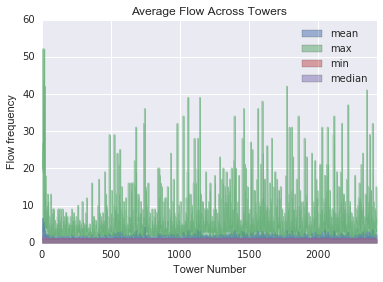

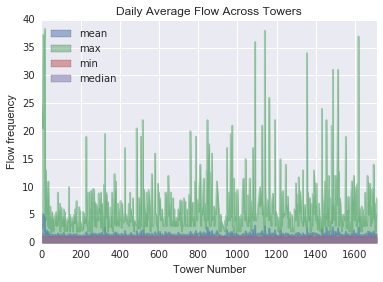

In [78]:
# Add your code below:
# all_database[:24][['flow01', 'flow12', 'flow23','flow34', 'flow45', 'flow56', 'flow67', 'flow78', 'flow89', 'flow910','flow1011', 'flow1112', 'flow1213', 'flow1314', 'flow1415', 'flow1516', 'flow1617', 'flow1718', 'flow1819', 'flow1920', 'flow2021', 'flow2122', 'flow2223', 'flow2324' ]].plot(kind='area', stacked=False, 
#                                                             legend=True, title='Tower Flows')

merged_database['mean']=merged_database[['flow01', 'flow12', 'flow23','flow34', 'flow45', 'flow56', 'flow67', 'flow78', 'flow89', 'flow910','flow1011', 'flow1112', 'flow1213', 'flow1314', 'flow1415', 'flow1516', 'flow1617', 'flow1718', 'flow1819', 'flow1920', 'flow2021', 'flow2122', 'flow2223', 'flow2324']].mean(axis=1)
merged_database['max']=merged_database[['flow01', 'flow12', 'flow23','flow34', 'flow45', 'flow56', 'flow67', 'flow78', 'flow89', 'flow910','flow1011', 'flow1112', 'flow1213', 'flow1314', 'flow1415', 'flow1516', 'flow1617', 'flow1718', 'flow1819', 'flow1920', 'flow2021', 'flow2122', 'flow2223', 'flow2324']].max(axis=1)
merged_database['min']=merged_database[['flow01', 'flow12', 'flow23','flow34', 'flow45', 'flow56', 'flow67', 'flow78', 'flow89', 'flow910','flow1011', 'flow1112', 'flow1213', 'flow1314', 'flow1415', 'flow1516', 'flow1617', 'flow1718', 'flow1819', 'flow1920', 'flow2021', 'flow2122', 'flow2223', 'flow2324']].min(axis=1)
merged_database['median']=merged_database[['flow01', 'flow12', 'flow23','flow34', 'flow45', 'flow56', 'flow67', 'flow78', 'flow89', 'flow910','flow1011', 'flow1112', 'flow1213', 'flow1314', 'flow1415', 'flow1516', 'flow1617', 'flow1718', 'flow1819', 'flow1920', 'flow2021', 'flow2122', 'flow2223', 'flow2324']].median(axis=1)

# all_database

# graph = pd.pivot_table(merged_database,index=['oid'], values=['mean', 'max', 'min','median'])
# graph


G1_1 = merged_database[['mean', 'max', 'min', 'median']].plot(kind='area', stacked=False, 
                                                            legend=True, title='Average Flow Across Towers')
G1_1.set_xlabel('Tower Number')
G1_1.set_ylabel('Flow frequency')

G1_2 = graph[['mean', 'max', 'min', 'median']].plot(kind='area', stacked=False, 
                                                            legend=True, title='Daily Average Flow Across Towers')
G1_2.set_xlabel('Tower Number')
G1_2.set_ylabel('Flow frequency')
# df.sort(['c1','c2'], ascending=[False,True])


# all_database_t = all_database.transpose()
# all_database_t.mean()

# all_database_t[['all_database_t.mean()', 'all_database_t.max()', 'all_database_t.min()']].plot(kind='area')

* Based on the overall trends that you just noticed with the previous plots, construct:
    1. An area plot based on the values of 5 towers with flow values that are closer to the average trend.
    2. An area plot based on the outlier values. You will plot 3 towers with flow values that are closer to the minimum trend, and towers with flow values that are closer to the maximum trend.

In [12]:
# Add your code below:


## Part 2

Now we will use the additional file provided to display the geographical location of every tower. We will first import the file and look at its structure. Since the file has no header, we will use the information provided on the `DATA_STRUCTURES.txt` file. The row number corresponds to the tower index; in order to relate every tower with the OD files, we will add an additional column with the row number as an index. We can do so with the following `DataFrame` function:
```Python
DataFrame.reset_index(level=0, inplace=True)
```


In [62]:
towers=pd.read_csv("data/Hourly Flows/towers_index.txt", header=None, 
               names=['Latitude', 'Longitude', 'Closest node ID'])
# Use the row value as the index column
towers.reset_index(level=0, inplace=True)
towers.head()

,index,Latitude,Longitude,Closest node ID
0,0,24.517,46.776,20404
1,1,24.517,46.890,16208
2,2,24.517,46.890,16208
3,3,24.524,46.710,18805
4,4,24.525,46.648,11072


If you look at the structure of the OD file, every tower is repeated several times: for every origin tower, there are several destinations. In SQL terms, we can use a `one-to-many` relationship to assign the geographic values of the towers, to the origin or destination towers. By joining a `DataFrame` `on` a given column, Pandas will assign the row value of every element that matches the value of the given column on the other `DataFrame`. We will also group the origin values of the OD Dataframe, and get their average before joining it with the towers’ geographical location. 

In [63]:
# from the OD df, use only two columns, then group them by 'oid'
# grouped_01 = df_01[['flow','oid']].groupby('oid').mean()
# grouped_01


bytower = merged_database[['oid', 'mean', 'max', 'min', 'median']].groupby('oid').mean()
# grouped_02

bytower.reset_index(level=0, inplace=True)
# grouped_02

bytower_geoloc = bytower.join(towers, on='oid')
bytower_geoloc
# grouped_01 = d3.values()[1].[['flow','oid']].groupby('oid').mean()



# d4 = d3
# for i in d4.values():
#     i[['flow','oid']].groupby('oid').mean() 

# if d4 == d3:
#     print 'true'
    
        
#         for i in d4.values():
#     i.reset_index(level=0, inplace = True)


#     OD_location = d3.values()[1].join(towers, on= 'oid')
    


,oid,mean,max,min,median,index,Latitude,Longitude,Closest node ID
0,1,2.583333,25.000000,1,1.000,1,24.517,46.890,16208
1,5,3.125000,20.500000,1,1.500,5,24.529,46.687,18825
2,6,4.513889,26.000000,1,1.500,6,24.530,46.722,18736
3,8,5.166667,37.250000,1,1.125,8,24.531,46.696,18763
4,12,4.791667,36.800000,1,1.000,12,24.534,46.717,18736
5,16,4.444444,38.333333,1,1.000,16,24.537,46.642,18725
6,17,2.541667,21.750000,1,1.000,17,24.538,46.712,16841
7,18,1.895833,11.000000,1,1.000,18,24.539,46.662,18729
8,20,1.291667,4.000000,1,1.000,20,24.539,46.662,18729
9,21,2.145833,13.000000,1,1.250,21,24.541,46.681,18755


Now that we have a new `DataFrame` with an average flow value for every origin tower, and their corresponding geographical location, we can use their lat/lon values to create a scatter plot. We can even vary their size based on the average flow. Since the flow variation across tower is not that big, we can use a log function to better visualize it on our plot. Numpy has a quick log implementation:
```Python
np.log(value)
```


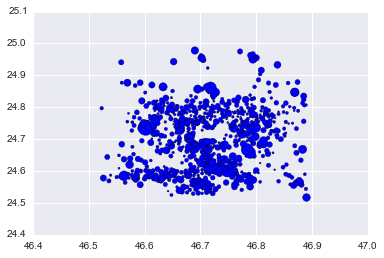

In [15]:
plt.scatter(OD_location['Longitude'],OD_location['Latitude'], s=np.log(OD_location['flow'])*100)
plt.show()

**Based on the code snippets, and your previous code your job is to build:**

* A function that creates a [color range](http://matplotlib.org/users/colormaps.html) based on a `numpy array` of numeric values [(Example 1)](http://stackoverflow.com/questions/12965075/matplotlib-scatter-plot-colour-as-function-of-third-variable), [(Example 2)](http://stackoverflow.com/questions/11364745/how-can-i-turn-a-numpy-array-into-a-matplotlib-colormap). The function must have the following inputs/outputs:
    1. Inputs: 
      1. A `numpy` `array` or a `Pandas DataSeries`
      * Two different colors to interpolate values between.
    2. Outputs: 
      1. A `numpy array` of `colors` or `color values` 
      

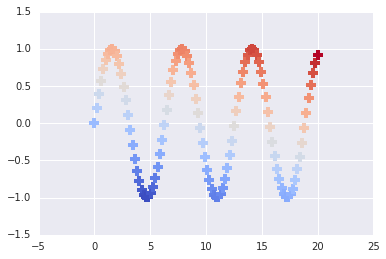

In [26]:
# Add your code below:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.linspace(0, 20, 100)
y = np.sin(x)
z = x + 20 * y

scaled_z = (z - z.min()) / z.ptp()
colors = plt.cm.coolwarm(scaled_z)

plt.scatter(x, y, marker='+', c=colors, s=100, linewidths=4)
plt.show()



# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import colors

#-----------------------------------------
# def array2cmap(X):
#     N = X.shape[0]
# 
#     r = np.linspace(0., 1., N+1)
#     r = np.sort(np.concatenate((r, r)))[1:-1]

#     rd = np.concatenate([[X[i, 0], X[i, 0]] for i in xrange(N)])
#     gr = np.concatenate([[X[i, 1], X[i, 1]] for i in xrange(N)])
#     bl = np.concatenate([[X[i, 2], X[i, 2]] for i in xrange(N)])

#     rd = tuple([(r[i], rd[i], rd[i]) for i in xrange(2 * N)])
#     gr = tuple([(r[i], gr[i], gr[i]) for i in xrange(2 * N)])
#     bl = tuple([(r[i], bl[i], bl[i]) for i in xrange(2 * N)])


#     cdict = {'red': rd, 'green': gr, 'blue': bl}
#     return colors.LinearSegmentedColormap('my_colormap', cdict, N)
#-----------------------------------------
# if __name__ == "__main__":

    #define the colormar
#     X = np.array([[0., 1., 0.],  #green
#                   [0., 0., 1.],  #blue
#                   [1., 1., 0.],  #yellow
#                   [1., 0., 0.]]) #red
#     mycmap = array2cmap(X)

#     values = np.random.rand(10, 10)
#     plt.gca().pcolormesh(values, cmap=mycmap)

#     cb = plt.cm.ScalarMappable(norm=None, cmap=mycmap)
#     cb.set_array(values)
#     cb.set_clim((0., 1.))
#     plt.gcf().colorbar(cb)
#     plt.show()

### All the plots below should be scatter plots. Parameterize the size of the points to the obtained values.

* A plot that visualizes the average flow values using the 24 hour ranges. Color the plots using the function to create the color array.
    * The `Dataframe` must be grouped and averaged by 'oid'
    * The flow values must be averaged across the 24 hr ranges. IE
    ```Python
    flow_ranges = [5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10]
    avg_flow = 7.5
    ```

In [3]:
# Add your code below:
x = np.linspace(0, 20, 100)
y = np.sin(x)
zmean = bytower_geoloc['mean']
scaled_zmean = zmean - zmean.min()
colors = plt.cm.coolwarm(scaled_zmean)

# scaled_z = (z - z.min()) / z.ptp()
# colors = plt.cm.coolwarm(scaled_z)

# plt.scatter(x, y, marker='+', c=colors, s=100, linewidths=4)
# plt.show()

G2_1 = plt.scatter(OD_location2['Longitude'],OD_location2['Latitude'], c=colors, s=np.log(OD_location2['mean'])*100,)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Flow values per tower, by geolocation')

plt.show()




NameError: name 'np' is not defined

* A plot that visualizes the maximum flow values using the 24 hour ranges. Color the plots using the function to create the color array.
    * The `Dataframe` must be grouped by 'oid', you can then use these values to find the `max()`
    * Use those flow values to find the `max()` across the 24 hr ranges. IE
    ```Python
    flow_ranges = [5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 100]
    max_flow = 100
    ```

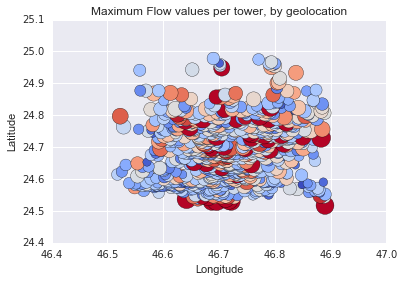

In [94]:
# Add your code below:
# Add your code below:
x = np.linspace(0, 20, 100)
y = np.sin(x)
zmax = bytower_geoloc['max']
scaled_zmax = zmax - zmax.min()
colors = plt.cm.coolwarm(scaled_zmean)

# scaled_z = (z - z.min()) / z.ptp()
# colors = plt.cm.coolwarm(scaled_z)

# plt.scatter(x, y, marker='+', c=colors, s=100, linewidths=4)
# plt.show()

plt.scatter(OD_location2['Longitude'],OD_location2['Latitude'], c=colors, s=np.log(OD_location2['max'])*100,)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Maximum Flow values per tower, by geolocation')
plt.show()



plt.show()





* A plot that visualizes the minimum flow values using the 24 hour ranges. Color the plots using the function to create the color array.
    * The `Dataframe` must be grouped by 'oid', you can then use these values to find the `min()`
    * Use those flow values to find the `min()` across the 24 hr ranges. IE
    ```Python
    flow_ranges = [5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 100]
    min_flow = 5
    ```

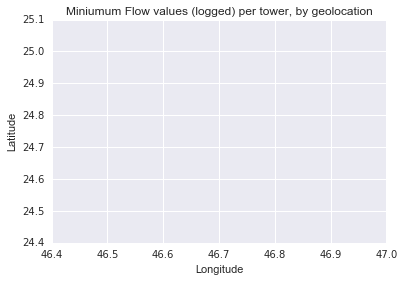

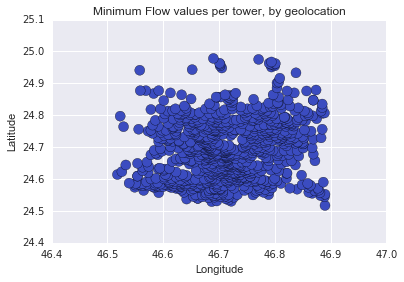

In [96]:
# Add your code below:
# Add your code below:
x = np.linspace(0, 20, 100)
y = np.sin(x)
zmin = bytower_geoloc['min']

scaled_zmin = zmin - zmin.min()
colors = plt.cm.coolwarm(scaled_zmin)

# plt.scatter(x, y, marker='+', c=colors, s=100, linewidths=4)
# plt.show()

plt.scatter(OD_location2['Longitude'],OD_location2['Latitude'], c=colors, s=np.log(OD_location2['min'])*100,)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Miniumum Flow values (logged) per tower, by geolocation')
plt.show()

plt.scatter(OD_location2['Longitude'],OD_location2['Latitude'], c=colors, s=OD_location2['min']*100,)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Minimum Flow values per tower, by geolocation')
plt.show()



## Graphic Presentation
#### Make sure to label all the axis, add legends and units (where appropriate).


## Code Quality
#### While code performance and optimization won't count, all the code should be highly readable, and reusable. Where possible, create functions, build helper functions where needed, and make sure the code is self-explanatory.